#**Neural Network Type Classification | TMNIST**

##**Dataset Used:**

Typography MNIST (TMNIST) with 94 characters and over 281,000 images

https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters/Links to an external site.

##**Abstract:**

This notebook outlines approaches for implementing neural networks to recognize digits on the MNIST dataset. Most deep learning frameworks have APIs for loading famous datasets like MNIST. However, when moving from an example dataset to the real data, we need to convert our training data into a format that the deep learning framework can accept.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.applications import VGG16
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras import backend as K
K.clear_session()



Importing the dataset

In [2]:
#reading the dataset
df=pd.read_csv('https://media.githubusercontent.com/media/akshitapathania7/Neural_Network_Type_Classification_TMNIST/main/94_character_TMNIST.csv')
df.head(10)

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Livvic-BoldItalic,x,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Sarabun-ExtraBold,J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,FiraSans-Light,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,AlegreyaSansSC-BoldItalic,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,NotoSerifSC-Light,k,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TMNIST, as we can see, is a large dataset of handwritten alphabets, digits and special characters that is commonly used for training various image processing systems.


In [3]:
#printing the size of dataframe
print('The total number of rows in datafame:', df.shape[0])
print('The total number of columns in datafame:', df.shape[1])

The total number of rows in datafame: 274093
The total number of columns in datafame: 786


In [4]:
#printing the total number of unique classes in the dataframe
number_classes = df['labels'].nunique()
print('The total number of classes are:', number_classes)

The total number of classes are: 94


In [5]:
#printing every unique class present in the dataframe
unique_classes = df['labels'].unique()
print('The unique classes are:')
print(unique_classes)

The unique classes are:
['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']


In [6]:
#getting the total number of font types present in the data
number_font = df['names'].nunique()
print('The total number of different type of fonts present are:', number_font)

The total number of different type of fonts present are: 2990


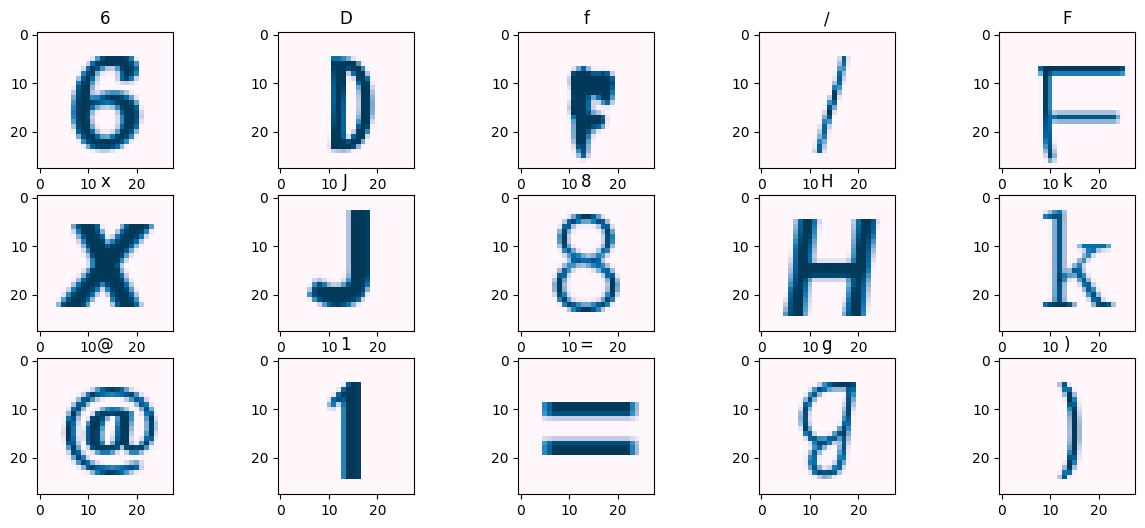

In [7]:
#defining the class column and removing other unnecessary columns
y=df['labels']
X=df.drop(['names','labels'],axis=1)

#displaying the plot of the values with their corresponding labels
plt.figure(figsize=(15, 6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.title(y.iloc[i])
  plt.imshow(X.values[i].reshape(28,28), cmap=plt.get_cmap('PuBu'))
plt.show()

We will be splitting the data into test and train datasets.


In [8]:
#Using stratified sampling to get some distribution of classes in the train and test data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42,stratify=y)

Preparing the Training and Testing Dataset (Data Preprocessing)

In [9]:
#The original pixel values vary from 0 - 255, for neural network models we are squishing the range to 0 - 1
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

In [10]:
#Now we encode the Y values using one hot encoder
encode = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded= encode.fit_transform(y_train.values.reshape(-1,1))
y_test_encoded=  encode.transform(y_test.values.reshape(-1,1))

In [11]:
X_train_norm=X_train.values.reshape(X_train.shape[0],28,28,1)
X_test_norm=X_test.values.reshape(X_test.shape[0],28,28,1)

In [12]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)
print('The training target shape is:',y_train_label.shape)
print('The test target shape is:',y_test_label.shape)

The training target shape is: (205569, 94)
The test target shape is: (68524, 94)


In [13]:
number_classes=df['labels'].nunique()

#Building the model

Convolutional Model (CNN Model) with 2 conv2D and MaxPooling2D Layers



In [14]:
model = Sequential()
model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(number_classes, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

Below, we have specified the batch_size as 64 and the epoch number as 10.

In [15]:
model_history = model.fit(X_train_norm, y_train_encoded, epochs=10, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=64)

Epoch 1/10
3213/3213 - 33s - loss: 0.8454 - accuracy: 0.7658 - val_loss: 0.4676 - val_accuracy: 0.8607 - 33s/epoch - 10ms/step
Epoch 2/10
3213/3213 - 19s - loss: 0.3952 - accuracy: 0.8795 - val_loss: 0.3459 - val_accuracy: 0.8961 - 19s/epoch - 6ms/step
Epoch 3/10
3213/3213 - 21s - loss: 0.3134 - accuracy: 0.9037 - val_loss: 0.3009 - val_accuracy: 0.9098 - 21s/epoch - 7ms/step
Epoch 4/10
3213/3213 - 19s - loss: 0.2686 - accuracy: 0.9164 - val_loss: 0.2718 - val_accuracy: 0.9173 - 19s/epoch - 6ms/step
Epoch 5/10
3213/3213 - 20s - loss: 0.2408 - accuracy: 0.9240 - val_loss: 0.2646 - val_accuracy: 0.9181 - 20s/epoch - 6ms/step
Epoch 6/10
3213/3213 - 21s - loss: 0.2217 - accuracy: 0.9289 - val_loss: 0.2655 - val_accuracy: 0.9198 - 21s/epoch - 7ms/step
Epoch 7/10
3213/3213 - 21s - loss: 0.2067 - accuracy: 0.9332 - val_loss: 0.2452 - val_accuracy: 0.9281 - 21s/epoch - 7ms/step
Epoch 8/10
3213/3213 - 21s - loss: 0.1941 - accuracy: 0.9363 - val_loss: 0.2426 - val_accuracy: 0.9276 - 21s/epoch - 

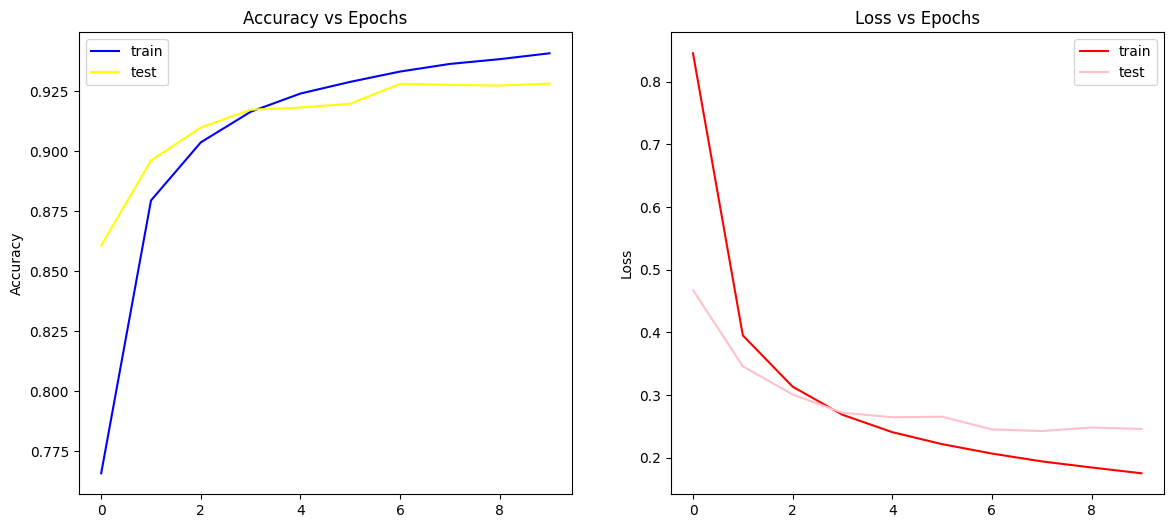

In [16]:
#Plotting the graphs of Accuracy vs Epochs and Loss vs Epochs
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(10)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train', color='blue')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test', color='yellow')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train', color='red')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test', color='pink')
plt.legend()
plt.show()

As we progress through each epoch, we have noticed a gradual improvement in the accuracy of the training data. Interestingly, when we compare it with the test data, we have observed that the accuracy of the latter starts at a higher point compared to that of the former.

As the neural network is trained over multiple epochs, we can observe a gradual reduction in the amount of error or loss in the training and test datasets. This indicates that the model is learning to make more accurate predictions over time, resulting in better performance when tested against new data.

In [17]:
#Evaluating model accuracy on test data
score = model.evaluate(X_test_norm, y_test_encoded, batch_size = 64,verbose = 2)
basicmodelAccuracy=round(score[1],4)*100
print(f"Test Accuracy:{basicmodelAccuracy}%")

1071/1071 - 4s - loss: 0.2460 - accuracy: 0.9281 - 4s/epoch - 3ms/step
Test Accuracy:92.81%


This study has achieved an impressive accuracy rate of approximately 92.81% on the test set. This advancement in the field has surpassed the previous state-of-the-art methods, and the results demonstrate the effectiveness of CNNs in real-world applications.

##**Conclusion:**
This study demonstrates the capability of Convolutional Neural Network (CNN) based methods for automated character recognition systems, specifically for typography classification on the difficult MNIST dataset that comprises of 94 alphabets. The suggested model employs a deep CNN architecture with several convolutional and pooling layers, along with data augmentation techniques, to account for the variability in the dataset.

With an exceptional accuracy rate of 92.81%, we can confirm the effectiveness of CNNs in real-world applications.

##**References:**
- https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/
- https://www.tensorflow.org/api_docs/python/tf
- https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939
- https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy

80% code is written by me with the other 20% referenced and modified from various sources such as Stackoverflow, and github.

#**License**

Copyright 2023 akshitapathania7

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.